In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Data
data = pd.read_csv("C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\eBayRevised1.csv", encoding="latin-1")

In [3]:
#Exploring Data
data.head()

,Mileage,Name,Price,Year
0,151000,2004 Acura TL Base,3700,2004
1,139134,1994 Acura Legend L Sedan 4-Door,2750,1994
2,70581,2005 Acura RL Base Sedan 4-Door,10995,2005
3,5000,1991 Acura NSX --,21900,1991
4,53180,2003 Acura NSX T,89000,2003


In [4]:
data.tail()

,Mileage,Name,Price,Year
237181,NotFound,Replica/Kit Makes,65000,NotFound
237182,11724,2015 Replica/Kit Makes SVE TR1ke,32750,NotFound
237183,10714,1957 Replica/Kit Makes Speedster,12986,1957
237184,4246,2015 Replica/Kit Makes GTM,12500,2015
237185,500,2008 Replica/Kit Makes GTM,25000,2008


Cleaning text data by removing Newline, Tabs and Carriage Return characters 

In [5]:
data["Name"] = data["Name"].map(lambda x: x.replace("\r",""))
data["Name"] = data["Name"].map(lambda x: x.replace("\n",""))
data["Name"] = data["Name"].map(lambda x: x.replace("\t",""))

Checking data types

In [6]:
data.dtypes

Mileage    object
Name       object
Price      object
Year       object
dtype: object

As "NotFound" was used as imputation value where ever scaping script was not able to find a valid value the below mentioned step removes those lines from the data set

In [7]:
CleanedData=data[data["Mileage"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Name"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Price"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Year"] != "NotFound"]

In [8]:
CleanedData.tail()

,Mileage,Name,Price,Year
237179,219,1969 Replica/Kit Makes SSK Replica Kit Car Gaz...,17611,1969
237180,0,1979 Replica/Kit Makes,18475.95,1979
237183,10714,1957 Replica/Kit Makes Speedster,12986,1957
237184,4246,2015 Replica/Kit Makes GTM,12500,2015
237185,500,2008 Replica/Kit Makes GTM,25000,2008


Converting data columns to valid data types

In [9]:
CleanedData["Mileage"]=CleanedData["Mileage"].astype(int)
CleanedData["Year"]=CleanedData["Year"].astype(int)
CleanedData=CleanedData[CleanedData.Price.apply(lambda x: x.isnumeric())]
CleanedData["Price"]=CleanedData["Price"].astype(int)

In [10]:
CleanedData.dtypes

Mileage     int32
Name       object
Price       int32
Year        int32
dtype: object

Identifying make of the car from "Name" column

In [11]:
#Setting make of the car
CleanedData["Make"] = CleanedData["Name"].map(lambda x: x.split(" ")[1])
CleanedData["Make"] = CleanedData["Make"].map(lambda x: x.upper())

In [12]:
#Setting Model of the car

def CarModel(STRING):
    try:
        String=STRING.split(" ")[2]
        return String
    except:
        return "NoModelName"
    
CleanedData["Model"] = CleanedData["Name"].map(lambda x: CarModel(x))

Identifying number of years a listed car has been on road (compared with 2017)

In [13]:
#Number of years On Road
CleanedData["OnRoadYrs"] = CleanedData["Year"].map(lambda x: 2017-x)

Cleaning data as:

Removing car listings where "On Road Year" < 0, Cars listed as 2018 or beyond(probable misprint). 

Removing car listings where "Price" > 200,000, Outliers.

Removing car listings where "Mileage" > 500,000, Outliers.

In [14]:
CleanedData=CleanedData[CleanedData["OnRoadYrs"] >= 0]
CleanedData=CleanedData[CleanedData["Price"] <= 2000000]
CleanedData=CleanedData[CleanedData["Mileage"] <= 500000]

In [15]:
CleanedData.head()

,Mileage,Name,Price,Year,Make,Model,OnRoadYrs
0,151000,2004 Acura TL Base,3700,2004,ACURA,TL,13
1,139134,1994 Acura Legend L Sedan 4-Door,2750,1994,ACURA,Legend,23
2,70581,2005 Acura RL Base Sedan 4-Door,10995,2005,ACURA,RL,12
3,5000,1991 Acura NSX --,21900,1991,ACURA,NSX,26
4,53180,2003 Acura NSX T,89000,2003,ACURA,NSX,14


In [16]:
CleanedData.describe()

,Mileage,Price,Year,OnRoadYrs
count,233827.000000,2.338270e+05,233827.000000,233827.000000
mean,46217.483242,3.876203e+04,2000.962057,16.037943
std,43784.238281,6.442216e+04,21.970772,21.929721
min,0.000000,1.000000e+00,1878.000000,0.000000
25%,14450.000000,1.299000e+04,2000.000000,2.000000
50%,36007.000000,2.359500e+04,2012.000000,5.000000
75%,63221.000000,3.899900e+04,2015.000000,17.000000
max,500000.000000,1.999995e+06,2017.000000,139.000000


Average car in the data set is priced at $38,762 and has run 43,784 miles

In [17]:
#Number of cars in the dataset
len(CleanedData)

233827

Breakup of car listings by year

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


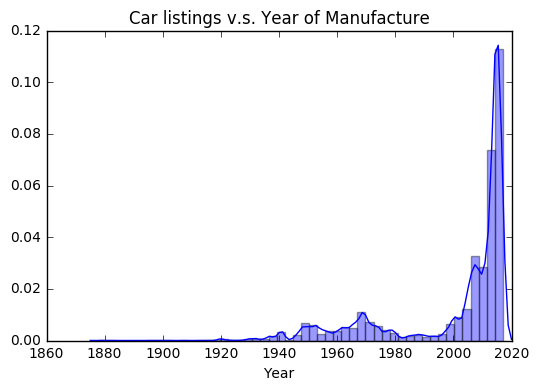

In [18]:
ax = sns.distplot(CleanedData["Year"])
ax.set(xlabel='Year')
ax.set_title("Car listings v.s. Year of Manufacture")
plt.show()

Binning Price, Mileage and Year on road.


Cutoff determined by plotting histogram on tableau

https://public.tableau.com/profile/sudhanshu.chib8525#!/vizhome/UsedCars_2/Dashboard1

In [19]:
#Binning or Categorising Variables:

def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning On Road Yrs
cut_points = [2,5,10,15,20,50]
labels = ["LessThan2","2To5","5To10","10To15","15To20","20To50","Heritage"]
CleanedData["CatYear"] = binning(CleanedData["OnRoadYrs"], cut_points, labels)

#Binning Mileage
cut_points = [5000,10000,20000,30000,50000,75000,100000,150000,300000]
labels = ["LessThan5K","5To10K","10To20K","20To30K","30To50K","50To75K","75To100K","100To150K","150To300K","Roundown"]
CleanedData["CatMileage"] = binning(CleanedData["Mileage"], cut_points, labels)

#Binning cars as Contemporary and Collectable
cut_points = [15]
labels = ["Contemporary","Collectable"]
CleanedData["CarType"] = binning(CleanedData["OnRoadYrs"], cut_points, labels)


In [20]:
#Removing unwanted Brands
CarBrands=["ACURA","ALFA","AMC","ASTON","AUDI","AUSTIN","BENTLEY","BMW","BUICK","CADILLAC","CHEVROLET","CHRYSLER","DAIHATSU","DATSUN",
           "DELOREAN","DESOTO","DODGE","EAGLE","FERRARI","FIAT","FISKER","FORD","GENESIS","GEO","GMC","HONDA","HUDSON","HUMMER","HYUNDAI",
           "INFINITI","INTERNATIONAL","ISUZU","JAGUAR","JEEP","KIA","LAMBORGHINI","LAND","LEXUS","LINCOLN","LOTUS","MASERATI","MAYBACH",
           "MAZDA","MCLAREN","MERCEDES-BENZ","MERCURY","MG","MINI","MITSUBISHI","NASH","NISSAN","OLDSMOBILE","PACKARD","PLYMOUTH",
           "PONTIAC","PORSCHE","RAM","RENAULT","ROLLS-ROYCE","SAAB","SATURN","SCION","SHELBY","SMART","STUDEBAKER","SUBARU","SUNBEAM",
           "SUZUKI","TESLA","TOYOTA","TRIUMPH","VOLVO","VOLKSWAGEN"]


In [21]:
CleanedData=CleanedData[CleanedData["Make"].isin(CarBrands)]

In [22]:
len(CleanedData)

223517

In [23]:
BrandMedPrice=CleanedData.groupby(["Make"], as_index=False)["Price"].median().sort_values(by="Price", ascending=False)
BrandMedPrice.columns = ["Brand", "MedianPrice"]


In [24]:
CleanedData.dtypes

Mileage          int32
Name            object
Price            int32
Year             int32
Make            object
Model           object
OnRoadYrs        int64
CatYear       category
CatMileage    category
CarType       category
dtype: object

In [25]:
CleanedData.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\CleanedDataRevised.csv', index=True, header=True)

Attempt to find benchmark values for depreciation with mileage and number of years on road.

Approach: Regress price on mileage and price on number of years on road for all the the population and then individually for each car brand.

When Price is regressed on mileage and # of years on road for the population the cofficient of regression cofficient will give us benchmarks for depreciation (ideally we should get negative cofficients).

Indvidual regression will give brand specific numbers which can then be compared with population benchmarks on a 2x2 grid to identify brands that outperform benchmarks (depreciate less than the average population)


In [26]:
from sklearn.linear_model import LinearRegression

Calculating impact of years on road and mileage on car's price by individually regressing them agaist price of the car

1. Running the algo for Contemporary cars (<15 yrs on road)

In [27]:
#Regression for Price Vs Mileage
lmMileage=LinearRegression()
Contemporary=CleanedData[CleanedData["CarType"] == "Contemporary"]
lmMileage.fit(Contemporary.iloc[:, 0].to_frame(), Contemporary.iloc[:, 2].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
MileageCoff=str(lmMileage.coef_).replace("[","").replace("]","").replace(" ","")
MileageCoff

'-0.41337775'

In [29]:
#Regression for Price Vs Number of Years on Road
lmYears=LinearRegression()
lmYears.fit(Contemporary.iloc[:, 0].to_frame(), Contemporary.iloc[:, 6].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
YrsOnRoadCoff=str(lmYears.coef_).replace("[","").replace("]","").replace(" ","")
YrsOnRoadCoff

'4.56325240e-05'

Benchmark for price depreciation with # of years on road came in close to 0. Which doea not make intutive sense.
From the graphs it is visible that Price decreases with mileage.
Hence this approach cannot be used forward.

In [31]:
BrandDepreciation=CleanedData.groupby(["Make","CatYear","CatMileage"]).Price.mean()
BrandDepreciation.head()

Make   CatYear    CatMileage
ACURA  LessThan2  LessThan5K    36667.052632
                  5To10K        34791.655087
                  10To20K       23004.096774
                  20To30K       30173.946354
                  30To50K       25338.067036
Name: Price, dtype: float64

In [32]:
BrandDepreciation=BrandDepreciation.unstack("CatYear")

In [33]:
BrandDepreciation.head()

CatYear              LessThan2         2To5    5To10    10To15    15To20  \
Make  CatMileage                                                           
ACURA LessThan5K  36667.052632          NaN      NaN       NaN       NaN   
      5To10K      34791.655087          NaN      NaN       NaN       NaN   
      10To20K     23004.096774          NaN      NaN  165000.0       NaN   
      20To30K     30173.946354  14234.21134  14595.0       NaN  179988.0   
      30To50K     25338.067036  15968.68661  17664.0   34221.0   18000.0   

CatYear            20To50  Heritage  
Make  CatMileage                     
ACURA LessThan5K  17449.5       NaN  
      5To10K          NaN       NaN  
      10To20K         NaN       NaN  
      20To30K         NaN       NaN  
      30To50K     62325.0       NaN

In [34]:
BrandDepreciation.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\DepreciationRevised.csv', index=True, header=True)